# The model: Asthma_detection


## Loading the data


In [ ]:
#importing the libraries
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import relu , sigmoid
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import TensorBoard

#importing the data
dataframe = pd.read_csv(r"/content/disease_data_asthma.csv")
dataframe = dataframe.dropna()

#differentiating the feature vector and the target vector
X_data = dataframe[['temperature' ,'resprate', 'heartrate' , 'o2sat' , 'sbp' , 'dbp']]
Y = dataframe[['has_asthma']]


## Splitting and Scaling the data

In [ ]:
#scaling the feature vector
scalar = StandardScaler()
scaled_training_data = scalar.fit_transform(X_data)
X = pd.DataFrame(scaled_training_data , columns = X_data.columns)

#converting the dataframes to numpy vectors
X_np = X.to_numpy()
Y_np = Y.to_numpy()

#splitting the data into training and cross validation set
X_train , X_cv , Y_train , Y_cv = train_test_split(X_np , Y_np , test_size = 0.2 , random_state = 42)

## Building and training the model

In [ ]:
#building the model
model = Sequential([
    tf.keras.layers.Dense(units = 60 , activation = 'relu' , kernel_regularizer = l2(0.01)),
    tf.keras.layers.Dense(units = 36 , activation = 'relu' , kernel_regularizer = l2(0.01)),
    tf.keras.layers.Dense(units = 12 , activation = 'relu' , kernel_regularizer = l2(0.01)),
    tf.keras.layers.Dense(units = 6 , activation = 'relu' , kernel_regularizer = l2(0.01)),
    tf.keras.layers.Dense(units = 1 , activation = 'sigmoid')
], name = "Asthma_detector")

#compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#fitting the model
model.fit(X_train , Y_train , epochs = 50)

Epoch 1/25
1523/1523 [==============================] - 7s 4ms/step - loss: 0.5231 - accuracy: 0.8295
Epoch 2/25
1523/1523 [==============================] - 7s 5ms/step - loss: 0.3990 - accuracy: 0.8683
Epoch 3/25
1523/1523 [==============================] - 6s 4ms/step - loss: 0.3639 - accuracy: 0.8966
Epoch 4/25
1523/1523 [==============================] - 7s 5ms/step - loss: 0.3304 - accuracy: 0.9230
Epoch 5/25
1523/1523 [==============================] - 6s 4ms/step - loss: 0.3119 - accuracy: 0.9296
Epoch 6/25
1523/1523 [==============================] - 8s 5ms/step - loss: 0.3007 - accuracy: 0.9325
Epoch 7/25
1523/1523 [==============================] - 6s 4ms/step - loss: 0.2924 - accuracy: 0.9351
Epoch 8/25
1523/1523 [==============================] - 7s 4ms/step - loss: 0.2849 - accuracy: 0.9351
Epoch 9/25
1523/1523 [==============================] - 6s 4ms/step - loss: 0.2799 - accuracy: 0.9367
Epoch 10/25
1523/1523 [==============================] - 7s 5ms/step - loss: 0.275

## Evaluating performance and making predicitons

In [ ]:
#making predictions on the cross validation set and verifying the model
Y_cv_pred = model.predict(X_cv)
y_cv_pred_binary = (Y_cv_pred > 0.5).astype(int)

print("Classification Report on cross validaiton set:")
print(classification_report(Y_cv, y_cv_pred_binary))

#making predictions on the training set
Y_train_pred = model.predict(X_train)
y_train_pred_binary = (Y_train_pred > 0.5).astype(int)

print("Classification Report on training set:")
print(classification_report(Y_train ,y_train_pred_binary))

381/381 [==============================] - 1s 2ms/step
Classification Report on cross validaiton set:
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93      5056
         1.0       0.99      0.91      0.95      7122

    accuracy                           0.94     12178
   macro avg       0.94      0.95      0.94     12178
weighted avg       0.95      0.94      0.94     12178

1523/1523 [==============================] - 3s 2ms/step
Classification Report on training set:
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93     19944
         1.0       0.99      0.91      0.95     28766

    accuracy                           0.94     48710
   macro avg       0.94      0.95      0.94     48710
weighted avg       0.95      0.94      0.94     48710



In [ ]:
#calculating accuracy on both the training and cross validation sets
accuracy_train = accuracy_score(y_train_pred_binary , Y_train)
accuracy_cv = accuracy_score(y_cv_pred_binary , Y_cv)

print(f"accuracy on training set is : {accuracy_train}")
print(f"accuracy on cross validation set is : {accuracy_cv}")


accuracy on training set is : 0.9401149661260522
accuracy on cross validation set is : 0.9397273772376417


# Visualizing the model


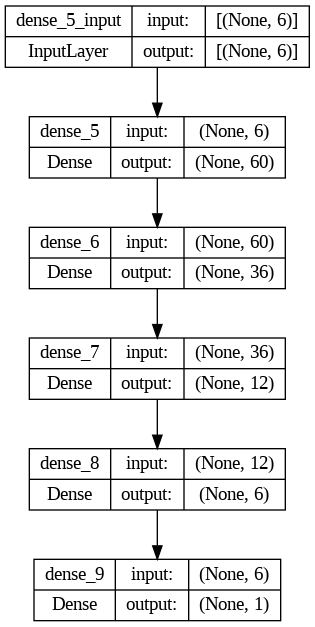

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.summary()

Model: "Asthma_detector"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 60)                420       
                                                                 
 dense_6 (Dense)             (None, 36)                2196      
                                                                 
 dense_7 (Dense)             (None, 12)                444       
                                                                 
 dense_8 (Dense)             (None, 6)                 78        
                                                                 
 dense_9 (Dense)             (None, 1)                 7         
                                                                 
Total params: 3145 (12.29 KB)
Trainable params: 3145 (12.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
